# easyDiffractionLib walkthrough

In [1]:
import numpy as np
from easyDiffractionLib import Crystal
from easyDiffractionLib.sample import Sample
from easyDiffractionLib.interface import InterfaceFactory
from easyDiffractionLib.Elements.Instruments.Instrument import Pattern

## Working with CIF files

We can load a cif file from the disk to create a `Crystal` object.  

In [2]:
phase = Crystal.from_cif_file('SrTiO3.cif')

We can check that it has loaded the cell:

In [3]:
print(phase.cell)

Cell: (a:5.52, b:5.52, c:7.81, alpha:90.00, beta:90.00, gamma:90.00) 


### Interfacing with a calculator

By default we are using the CrysFML calculator. We can start an interface with the interface factory

In [4]:
interface = InterfaceFactory()
print(interface.current_interface_name)

CrysFML


Before we can simulate a pattern we have to create a `Pattern` with instrumental parameters. At the moment this is just the wavelength and reolution parameters

In [5]:
pattern = Pattern()

### Simulating a pattern

In [7]:
sample = Sample(phases=phase, parameters=pattern, interface=interface)

We can define a 2-theta range and simulate

In [8]:
ttheta = np.linspace(5, 150, 1000)
intensity = interface.fit_func(ttheta)

And plot it:

<IPython.core.display.Javascript object>


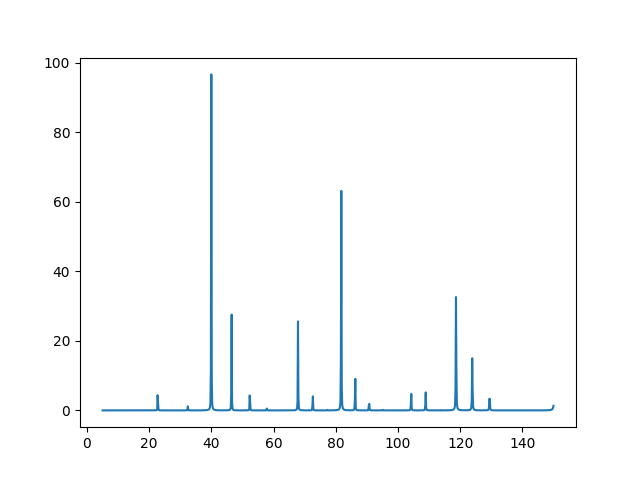

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(ttheta, intensity)

# Starting from Scratch

In [10]:
from easyDiffractionLib import Cell, Site, Atoms, SpaceGroup

Now we are going to make all the components of a phase. All classes have a `from_pars` and `default` option for ease of creation.

In [11]:
# Create a cell by parameters
cell = Cell.from_pars(7, 7, 7, 90, 90, 90)
# Create a default spacegroup. This will be P1 by default.
sg = SpaceGroup.default()
# Now create some atoms to add to the `Atoms` object. Note that any names can be excluded.
atom1 = Site.from_pars(label='Fe', specie='Fe3+', fract_x=0, fract_y=0.25, fract_z=0.25)
# The site default creator puts an atom at (0, 0, 0) and needs a unique label and a specie.
atom2 = Site.default('Cu', 'Cu2+')
atoms = Atoms('my_atoms', atom1, atom2)

# A new phase has to have a label
new_phase = Crystal('strangeComposition', spacegroup=sg, cell=cell, atoms=atoms)

This `new_phase` can now be used for generating a pattern

<IPython.core.display.Javascript object>


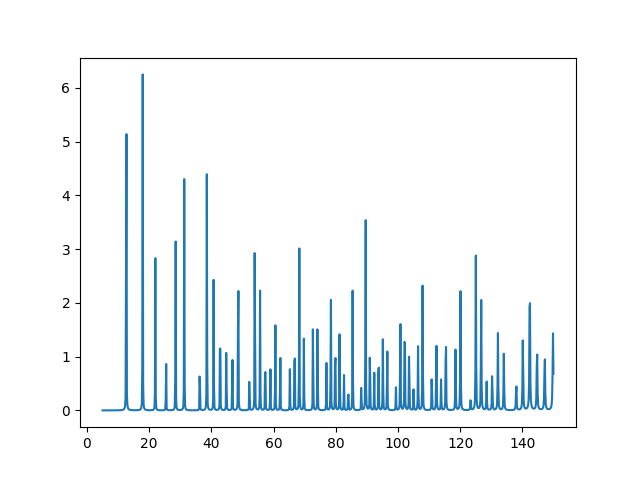

In [12]:
# We can generate a sample without a phase and add it later
sample_new = Sample(parameters=pattern, interface=interface)
sample_new.phases = new_phase

# Plotting the results
intensity = interface.fit_func(ttheta)
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(ttheta, intensity)

We can even play around with any parameter i.e.wavelength

In [12]:
%matplotlib inline
from ipywidgets import interactive

def f(wavelength):
    sample_new.parameters.wavelength = wavelength
    plt.figure()
    plt.plot(ttheta, interface.fit_func(ttheta))
    plt.show()

interactive_plot = interactive(f, wavelength=(1, 5))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=3, description='wavelength', max=5, min=1), Output()), _dom_classes=('wi…

We can see what parameters we can play around with:

In [13]:
# We can get the parameters with:
pars = sample.get_parameters()
print(pars)

[<Parameter 'length_a' = 5.5202+/-0 angstrom (fixed), bounds=[0:inf]>, <Parameter 'length_b' = 5.5202+/-0 angstrom (fixed), bounds=[0:inf]>, <Parameter 'length_c' = 7.8067+/-0 angstrom (fixed), bounds=[0:inf]>, <Parameter 'angle_alpha' = 90.0+/-0 degree (fixed), bounds=[0:inf]>, <Parameter 'angle_beta' = 90.0+/-0 degree (fixed), bounds=[0:inf]>, <Parameter 'angle_gamma' = 90.0+/-0 degree (fixed), bounds=[0:inf]>, <Parameter 'occupancy' = 1.0+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_x' = 0.0+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_y' = 0.0+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_z' = 0.25+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'Uiso' = 0.00608+/-0 angstrom ** 2 (fixed), bounds=[0:inf]>, <Parameter 'occupancy' = 1.0+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_x' = 0.5+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_y' = 0.0+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_z' = 0.0+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'Uiso' = 0.0050

But this isn't very helpful. To make it more visuall~y appealing:

In [14]:
from easyCore.Utils.classTools import generatePath
_, par_path = generatePath(sample_new, True)
print('\n'.join(par_path))

Phases.strangeComposition.cell.length_a
Phases.strangeComposition.cell.length_b
Phases.strangeComposition.cell.length_c
Phases.strangeComposition.cell.angle_alpha
Phases.strangeComposition.cell.angle_beta
Phases.strangeComposition.cell.angle_gamma
Phases.strangeComposition.my_atoms.Fe.occupancy
Phases.strangeComposition.my_atoms.Fe.fract_x
Phases.strangeComposition.my_atoms.Fe.fract_y
Phases.strangeComposition.my_atoms.Fe.fract_z
Phases.strangeComposition.my_atoms.Cu.occupancy
Phases.strangeComposition.my_atoms.Cu.fract_x
Phases.strangeComposition.my_atoms.Cu.fract_y
Phases.strangeComposition.my_atoms.Cu.fract_z
Instrument.u_resolution
Instrument.v_resolution
Instrument.w_resolution
Instrument.x_resolution
Instrument.wavelength


## Changing calculator

By default we use the CrysFML calculator, but we can change to another. i.e. Cryspy

In [15]:
interface.switch('Cryspy')
# This is a temp fix...
sample_new._updateInterface()

And do a simulation as before

<IPython.core.display.Javascript object>


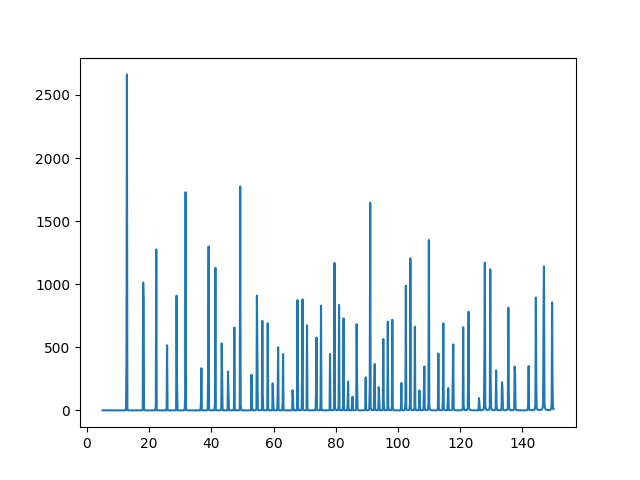

/home/simonward/.cache/pypoetry/virtualenvs/easydiffractionlib-jQmFKVli-py3.7/lib/python3.7/site-packages/cryspy/B_parent_classes/cl_1_item.py:135: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ((value == ".") | (value is None)):
/home/simonward/.cache/pypoetry/virtualenvs/easydiffractionlib-jQmFKVli-py3.7/lib/python3.7/site-packages/cryspy/B_parent_classes/cl_3_data.py:139: UserWarning: Double items were given.
  warn("Double items were given.", UserWarning)
/home/simonward/.cache/pypoetry/virtualenvs/easydiffractionlib-jQmFKVli-py3.7/lib/python3.7/site-packages/cryspy/B_parent_classes/cl_3_data.py:125: UserWarning: Access to variable by 'pd_instr_resolution'.
  warn(f"Access to variable by '{name_new:}'.", UserWarning)
/home/simonward/.cache/pypoetry/virtualenvs/easydiffractionlib-jQmFKVli-py3.7/lib/python3.7/site-packages/cryspy/B_parent_classes/cl_3_data.py:125: UserWarning: Access to variable by '

In [16]:
sample_new.parameters.wavelength = 1.56

%matplotlib notebook
plt.figure()
plt.plot(ttheta, interface.fit_func(ttheta))
plt.show()

We can see what interfaces are available and switch between

In [17]:
interfaces = interface.available_interfaces
print(interfaces)

['CrysFML', 'Cryspy']


In [18]:
interface.switch('CrysFML')
sample_new._updateInterface()

<IPython.core.display.Javascript object>


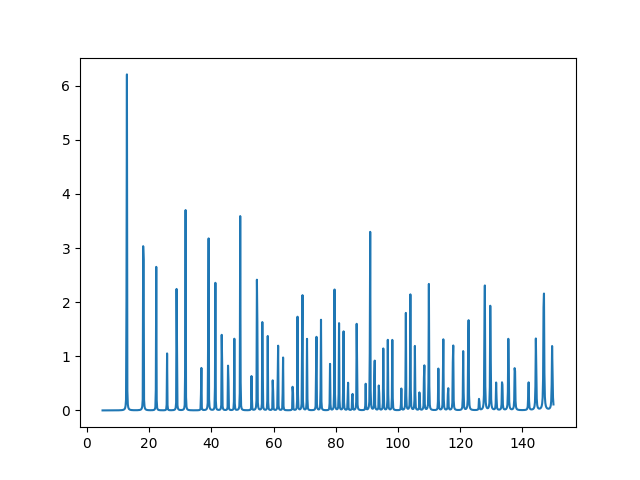

In [19]:
%matplotlib notebook
plt.figure()
plt.plot(ttheta, interface.fit_func(ttheta))
plt.show()